Example 2
---
Predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), 
per capita income (dollars), paved highways (in miles) and the proportion of population that has a license.
---
In the first example we performed linear regression involving two variables. 
Almost all real world problems that you are going to encounter will have more than two variables. 
Linear regression involving multiple variables is called "multiple linear regression". 
The steps to perform multiple linear regression are almost similar to that of simple linear regression. 
The difference lies in the evaluation. 
You can use it to find out which factor has the highest impact on the predicted output 
and how different variables relate to each other.

In [42]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline 

In [43]:
df=pd.read_csv('../petrol_consumption.csv')

In [44]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


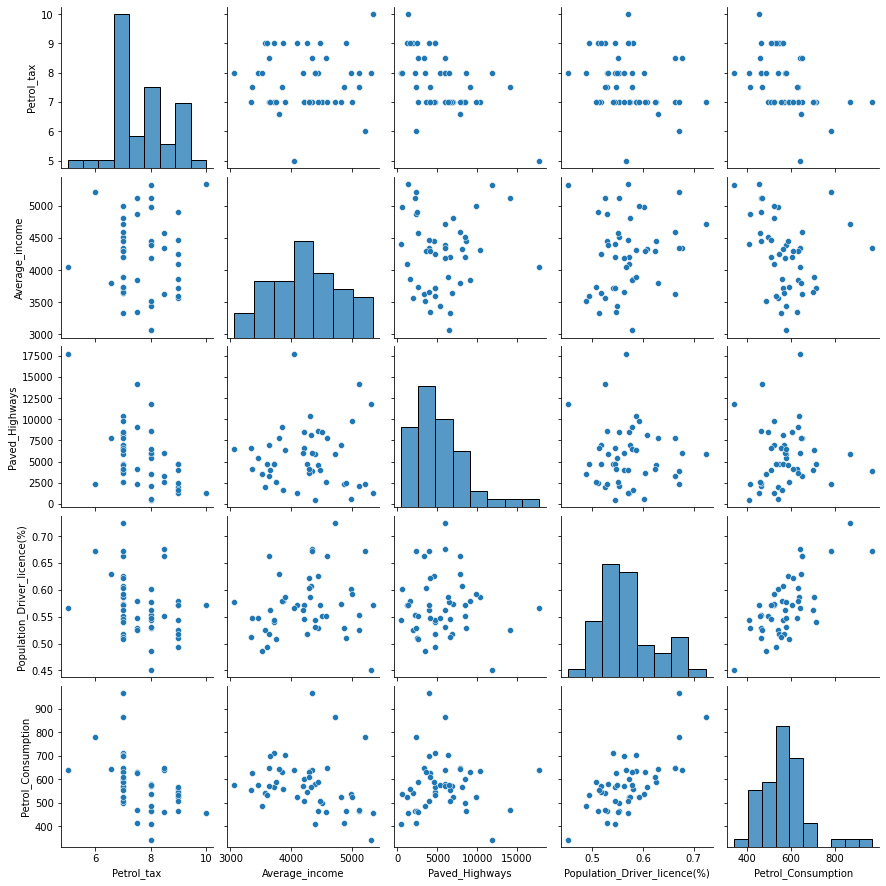

In [46]:
sns.pairplot(df)

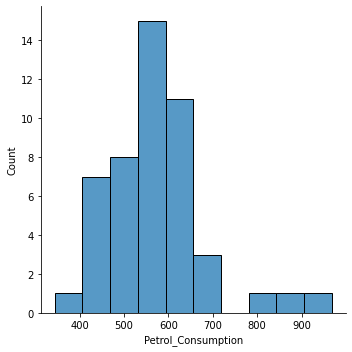

In [34]:
sns.displot(df['Petrol_Consumption'])

In [35]:
# Preparing the Data
# ---
# Dividing the data into attributes and labels as we did previously. 
# However, unlike last time, this time around we are going to use column names for creating an attribute set and label.
# ---
# 

X = df[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = df['Petrol_Consumption']

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0) 

In [37]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
print(regressor.intercept_)
print(regressor.coef_)

425.5993322032425
[-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


In [47]:
coeff_df=pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'] )
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [40]:
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [41]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# We can see that the value of root mean squared error is 60.07, 
# which is slightly greater than 10% of the mean value of the gas consumption in all states. 
# This means that our algorithm was not very accurate but can still make reasonably good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Need more data: Only one year worth of data isn't that much, 
#    whereas having multiple years worth could have helped us improve the accuracy quite a bit.
# 2. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine that. 
# 3. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.

Mean Absolute Error: 56.822247478964734
Mean Squared Error: 4666.344787588367
Root Mean Squared Error: 68.31064915215173
